In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> Note: Retrieve Data set from here:
[Tbilisi Apartments](https://www.kaggle.com/datasets/beridzeg45/tbilisi-apartment-prices?resource=download)

In [24]:
data = pd.read_csv("/content/drive/MyDrive/Tbilisi_Apartments.csv")
data.head(10)

,ArticleID,Date,Suburb,Street,Type,Area (SQM),Rooms,Floor,Price (GEL),PriceSQMT (GEL),Description
0,55880,2023-05-02,გლდანში,ა მიკრორაიონი - გლდანი,ახალი აშენებული,57.0,2,3.0,170000.0,2982.456140,იყიდება გლდანში „ა“ მიკროში თეიმურაზ ბოჭორიშვი...
1,58600,2023-05-02,ნუცუბიძის ფერდობზე,ნუცუბიძის IV პლატო,ძველი აშენებული,42.0,2,9.0,132000.0,3142.857143,"იყიდება 2 ოთახიანი ბინა თბილისში , ნუცუბიძის მ..."
2,58587,2023-05-02,გლდანში,ა მიკრორაიონი - გლდანი,ახალი აშენებული,73.0,3,4.0,198000.0,2712.328767,იყიდება გლდანში 73.5 კვადრატი 3 ოთახიანი კუთხ...
3,58588,2023-05-02,საბურთალოზე,ბოჭორიშვილის ქ.,ახალი აშენებული,152.0,5,5.0,461000.0,3032.894737,იყიდება 5 ოთახიანი გარემონტებული ბინა 3 ნათე...
4,58589,2023-05-02,ნაძალადევში,ჭყონდიდელის ქ.,ახალი აშენებული,42.0,1,9.0,125000.0,2976.190476,"იყიდება ჭყონდიდელის ქუჩაზე, ახალ აშენებულ დასრ..."
5,58590,2023-05-02,ვაშლიჯვარში,არზაყან ემუხვარის ქ.,ძველი აშენებული,95.0,5,8.0,157000.0,1652.631579,იყიდება 90 კვ.მ ბინა ვაშლიჯვარში. სამი საძინებ...
6,58591,2023-05-02,გლდანში,VIII მიკრორაიონი - გლდანი,ძველი აშენებული,55.0,2,9.0,122000.0,2218.181818,ვარ მეპატრონე სასწრაფოდ იყიდება გლდანში 8მიკრო...
7,58592,2023-05-02,ნაძალადევში,გურამიშვილის გამზ. (ნაძალადევი),ახალი აშენებული,65.0,3,7.0,214000.0,3292.307692,იყიდება ახალაშენებულ დონა პალასი სანზონას კომპ...
8,58593,2023-05-02,ჩუღურეთში,აღმაშენებლის გამზ.,ძველი აშენებული,167.0,5,3.0,696000.0,4167.664671,Იყიდება ყველაზე ტურისტულ და არაჩვეულებრივ ადგი...
9,58594,2023-05-02,საბურთალოზე,ნუცუბიძის ქ.,ძველი აშენებული,62.0,3,4.0,180000.0,2903.225806,იყიდება მეტრო დელისის მიმდებარედ 3 ოტახიანი ბი...


In [25]:
data.isna().sum()

,0
ArticleID,0
Date,0
Suburb,0
Street,0
Type,15
Area (SQM),0
Rooms,0
Floor,6
Price (GEL),0
PriceSQMT (GEL),0


In [26]:
data.dtypes

,0
ArticleID,int64
Date,object
Suburb,object
Street,object
Type,object
Area (SQM),float64
Rooms,object
Floor,float64
Price (GEL),float64
PriceSQMT (GEL),float64


In [27]:
data["Type"] = data["Type"].map({"ახალი აშენებული": 1, "ძველი აშენებული": 0}) # Convert text types
data["Type"] = data["Type"].fillna(data["Type"].median()) # replace missing Type values with median
data["Type"] = data["Type"].astype(int) # Convert float types to integer

data.head(10)


,ArticleID,Date,Suburb,Street,Type,Area (SQM),Rooms,Floor,Price (GEL),PriceSQMT (GEL),Description
0,55880,2023-05-02,გლდანში,ა მიკრორაიონი - გლდანი,1,57.0,2,3.0,170000.0,2982.456140,იყიდება გლდანში „ა“ მიკროში თეიმურაზ ბოჭორიშვი...
1,58600,2023-05-02,ნუცუბიძის ფერდობზე,ნუცუბიძის IV პლატო,0,42.0,2,9.0,132000.0,3142.857143,"იყიდება 2 ოთახიანი ბინა თბილისში , ნუცუბიძის მ..."
2,58587,2023-05-02,გლდანში,ა მიკრორაიონი - გლდანი,1,73.0,3,4.0,198000.0,2712.328767,იყიდება გლდანში 73.5 კვადრატი 3 ოთახიანი კუთხ...
3,58588,2023-05-02,საბურთალოზე,ბოჭორიშვილის ქ.,1,152.0,5,5.0,461000.0,3032.894737,იყიდება 5 ოთახიანი გარემონტებული ბინა 3 ნათე...
4,58589,2023-05-02,ნაძალადევში,ჭყონდიდელის ქ.,1,42.0,1,9.0,125000.0,2976.190476,"იყიდება ჭყონდიდელის ქუჩაზე, ახალ აშენებულ დასრ..."
5,58590,2023-05-02,ვაშლიჯვარში,არზაყან ემუხვარის ქ.,0,95.0,5,8.0,157000.0,1652.631579,იყიდება 90 კვ.მ ბინა ვაშლიჯვარში. სამი საძინებ...
6,58591,2023-05-02,გლდანში,VIII მიკრორაიონი - გლდანი,0,55.0,2,9.0,122000.0,2218.181818,ვარ მეპატრონე სასწრაფოდ იყიდება გლდანში 8მიკრო...
7,58592,2023-05-02,ნაძალადევში,გურამიშვილის გამზ. (ნაძალადევი),1,65.0,3,7.0,214000.0,3292.307692,იყიდება ახალაშენებულ დონა პალასი სანზონას კომპ...
8,58593,2023-05-02,ჩუღურეთში,აღმაშენებლის გამზ.,0,167.0,5,3.0,696000.0,4167.664671,Იყიდება ყველაზე ტურისტულ და არაჩვეულებრივ ადგი...
9,58594,2023-05-02,საბურთალოზე,ნუცუბიძის ქ.,0,62.0,3,4.0,180000.0,2903.225806,იყიდება მეტრო დელისის მიმდებარედ 3 ოტახიანი ბი...


In [28]:
data.isna().sum()

,0
ArticleID,0
Date,0
Suburb,0
Street,0
Type,0
Area (SQM),0
Rooms,0
Floor,6
Price (GEL),0
PriceSQMT (GEL),0


In [29]:
data.drop(["Description", "ArticleID", "Street"], axis=1, inplace=True)
data.head(10)

,Date,Suburb,Type,Area (SQM),Rooms,Floor,Price (GEL),PriceSQMT (GEL)
0,2023-05-02,გლდანში,1,57.0,2,3.0,170000.0,2982.456140
1,2023-05-02,ნუცუბიძის ფერდობზე,0,42.0,2,9.0,132000.0,3142.857143
2,2023-05-02,გლდანში,1,73.0,3,4.0,198000.0,2712.328767
3,2023-05-02,საბურთალოზე,1,152.0,5,5.0,461000.0,3032.894737
4,2023-05-02,ნაძალადევში,1,42.0,1,9.0,125000.0,2976.190476
5,2023-05-02,ვაშლიჯვარში,0,95.0,5,8.0,157000.0,1652.631579
6,2023-05-02,გლდანში,0,55.0,2,9.0,122000.0,2218.181818
7,2023-05-02,ნაძალადევში,1,65.0,3,7.0,214000.0,3292.307692
8,2023-05-02,ჩუღურეთში,0,167.0,5,3.0,696000.0,4167.664671
9,2023-05-02,საბურთალოზე,0,62.0,3,4.0,180000.0,2903.225806


In [30]:
data["Floor"] = data["Floor"].fillna(data["Floor"].median())
data["Floor"] = data["Floor"].astype(int)
data.head(10)

,Date,Suburb,Type,Area (SQM),Rooms,Floor,Price (GEL),PriceSQMT (GEL)
0,2023-05-02,გლდანში,1,57.0,2,3,170000.0,2982.456140
1,2023-05-02,ნუცუბიძის ფერდობზე,0,42.0,2,9,132000.0,3142.857143
2,2023-05-02,გლდანში,1,73.0,3,4,198000.0,2712.328767
3,2023-05-02,საბურთალოზე,1,152.0,5,5,461000.0,3032.894737
4,2023-05-02,ნაძალადევში,1,42.0,1,9,125000.0,2976.190476
5,2023-05-02,ვაშლიჯვარში,0,95.0,5,8,157000.0,1652.631579
6,2023-05-02,გლდანში,0,55.0,2,9,122000.0,2218.181818
7,2023-05-02,ნაძალადევში,1,65.0,3,7,214000.0,3292.307692
8,2023-05-02,ჩუღურეთში,0,167.0,5,3,696000.0,4167.664671
9,2023-05-02,საბურთალოზე,0,62.0,3,4,180000.0,2903.225806


In [31]:

data["Suburb"].unique()
suburb_filter_obj = {}

for i in range(0, len(data["Suburb"].unique())):
    suburb_filter_obj[data["Suburb"].unique()[i]] = i

with open("/content/drive/MyDrive/suburb.txt", "w") as file:
    file.write(str(suburb_filter_obj))


data["Suburb"] = data["Suburb"].map(suburb_filter_obj)
data.head()


,Date,Suburb,Type,Area (SQM),Rooms,Floor,Price (GEL),PriceSQMT (GEL)
0,2023-05-02,0,1,57.0,2,3,170000.0,2982.456140
1,2023-05-02,1,0,42.0,2,9,132000.0,3142.857143
2,2023-05-02,0,1,73.0,3,4,198000.0,2712.328767
3,2023-05-02,2,1,152.0,5,5,461000.0,3032.894737
4,2023-05-02,3,1,42.0,1,9,125000.0,2976.190476


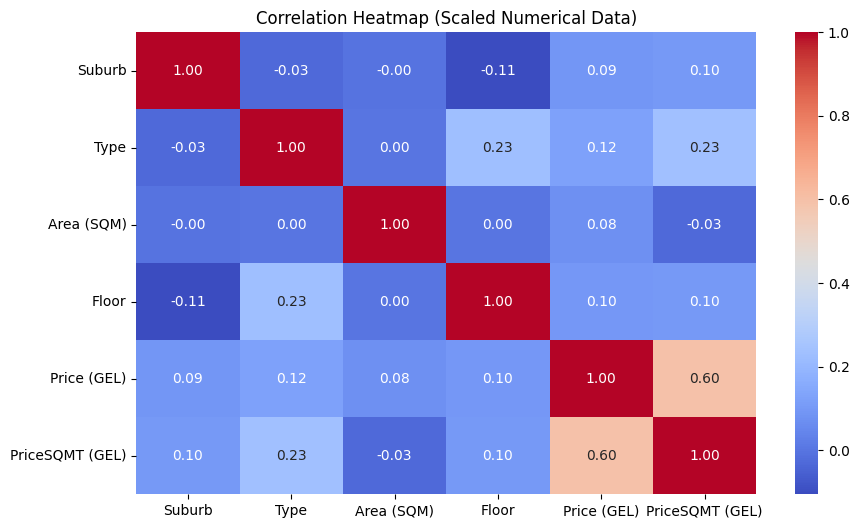

In [32]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

plt.figure(figsize=(10, 6))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Scaled Numerical Data)')
plt.show() #

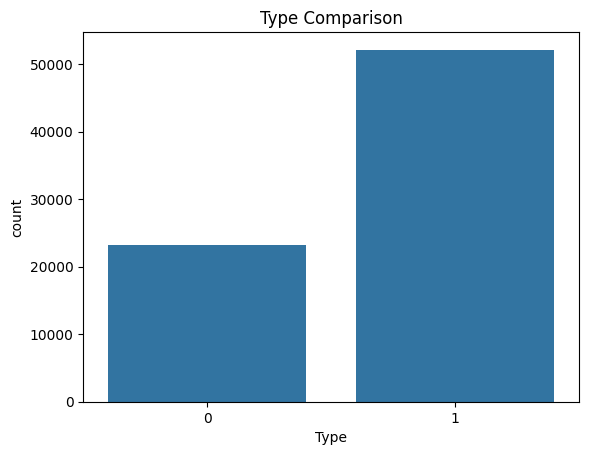

In [33]:
sns.countplot(x='Type', data=data)
plt.title('Type Comparison')
plt.show()

In [34]:
data.drop("Rooms", axis=1, inplace=True)
data.head()

,Date,Suburb,Type,Area (SQM),Floor,Price (GEL),PriceSQMT (GEL)
0,2023-05-02,0,1,57.0,3,170000.0,2982.456140
1,2023-05-02,1,0,42.0,9,132000.0,3142.857143
2,2023-05-02,0,1,73.0,4,198000.0,2712.328767
3,2023-05-02,2,1,152.0,5,461000.0,3032.894737
4,2023-05-02,3,1,42.0,9,125000.0,2976.190476


In [35]:
data["Area (SQM)"] = data["Area (SQM)"].astype(int)
data["Price (GEL)"] = data["Price (GEL)"].astype(int)
data.head()

,Date,Suburb,Type,Area (SQM),Floor,Price (GEL),PriceSQMT (GEL)
0,2023-05-02,0,1,57,3,170000,2982.456140
1,2023-05-02,1,0,42,9,132000,3142.857143
2,2023-05-02,0,1,73,4,198000,2712.328767
3,2023-05-02,2,1,152,5,461000,3032.894737
4,2023-05-02,3,1,42,9,125000,2976.190476


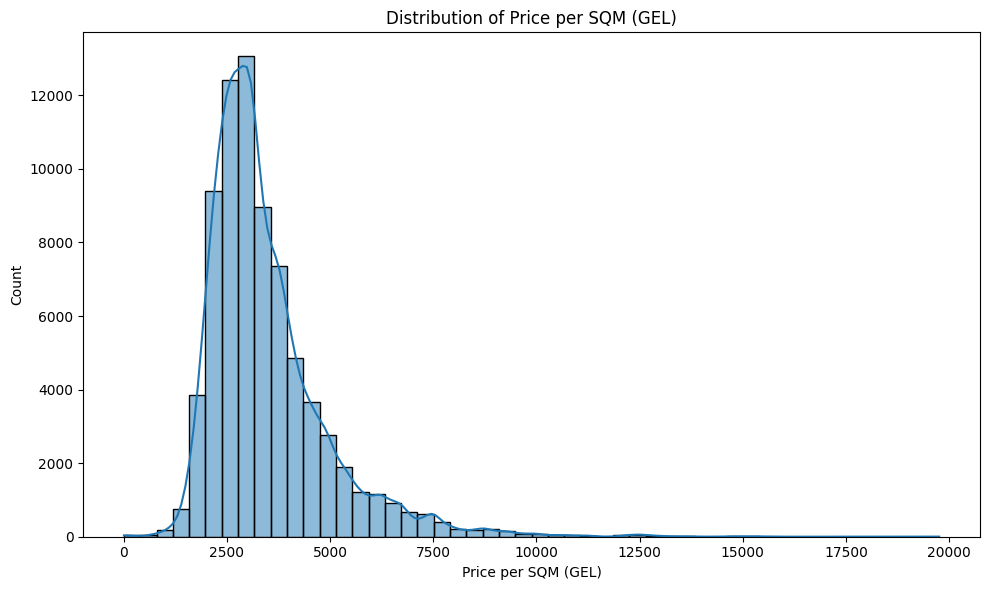

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='PriceSQMT (GEL)', bins=50, kde=True)
plt.title('Distribution of Price per SQM (GEL)')
plt.xlabel('Price per SQM (GEL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


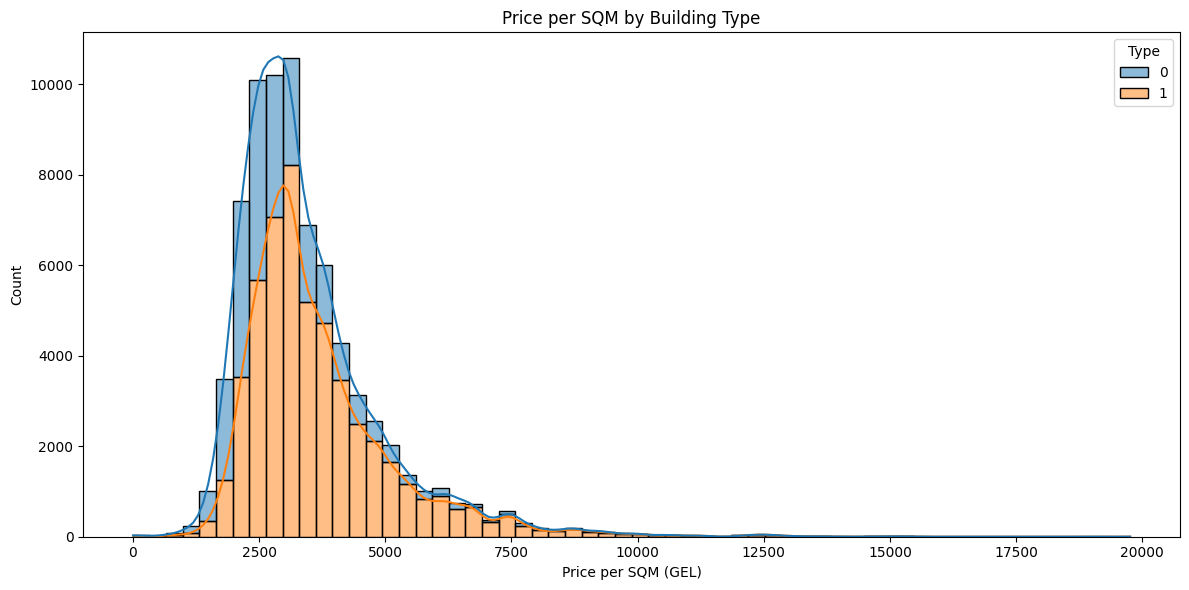

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='PriceSQMT (GEL)', hue='Type', bins=60, kde=True, multiple='stack')
plt.title('Price per SQM by Building Type')
plt.xlabel('Price per SQM (GEL)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
